## 【AIコース】CNN大課題

#### <u>課題の要件</u>
<font color = "Indigo">
1. 【課題】CNNとはどういった手法なのか記述せよ  
2. 【課題】畳み込み層とプーリング層について記述せよ  
3. 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ  
4. 【課題】データの読み込み  
5. 【課題】画像をまとめて表示  
6. 【課題】大きさの取得  
7. 【課題】正規化  
8. 【課題】one-hot表現への変換  
9. 【課題】モデルを作成  
10. 【課題】このようなモデルにした理由  
</font>
#### <u>課題の流れ</u>
<br />
・導入  
・データ取得  
・前処理  
・CNNの実装  

<b>1. 【課題】CNNはどういった手法なのか記述せよ</b>  
<br />
<u><b>答え:</b></u>  
人間の視野角のニューロンの構成に似ていて、画像認識や音声認識に使われる手法  
<br />
通常のニューラルネットワークと同じく、構造として学習可能な重みとバイアスを持つニューロンを保持し、処理としてニューロンが受け取る入力に対しドット積を施し、それを非線形的な形で処理することで学習と出力をする。また、通常のニューラルネットワークと同様に、CNNは入力層、ニューロンを保持する隠れ層、および出力層で構成される。  
<br />
CNNの特徴である二次元データの畳み込み処理は人間の視野角似ているため、人間の学習行動に似た学習をすることが期待される。また、CNNは通常のニューラルネットワークにある全結合層だけでなく、主に学習処理を担う畳み込み層と情報量の調整を担うプーリング層を構成する。 この特徴を利用して、画像処理だけでなく音声処理や株価などの時系列の処理などにも応用範囲が広まっている。    
<br />
CNNのメカニズムを応用した技術に、初期のLeNet、近年ではAlexNet、AlexNetを発展させたVGG、GoogLeNetやResNetなどが挙げられる。  
<br />
参考文献:  
・DIVERのテキスト  
・「ゼロから作るDeep Learning」 - オライリージャパン  
・http://cs231n.github.io/convolutional-networks/  
・https://ja.wikipedia.org/wiki/ディープラーニング  
・https://kaigi.org/jsai/webprogram/2017/pdf/1112.pdf

<font color = "Indigo"><b>2. 【課題】畳み込み層とプーリング層について記述せよ</b></font>  
<br />
<font color = "Indigo"><b>(1) 畳み込み層について</b></font>  
<br />
<u><b>答え:</b></u>  
畳み込み層は全結合層で問題となる、ニューロン同士の全結合による画像の位置や空間情報の消失を解消する。つまり、受け取る画像データを画像の位置や空間情報を維持する三次元配列のデータとして処理し、次の層へも三次元配列のデータとして出力する。  
<br />
畳み込み層では、入力配列と任意の値が設定されているフィルタ(畳み込み行列)と呼ばれる配列のドット積を取り、画像データと共に演算結果を次の層に出力する。入力配列とフィルタはお互い同じ行列数とは限らず、フィルタの行列数の方が小さいことがあるため、入力行列に対しフィルタをずらしながらドット積を行う。このドット積において、畳み込み層では、全結合層にはない<b>パディング</b>と<b>ストライド</b>といった人間が設定するハイパーパラメータを使用する。そして、フィルタのサイズだけでなく、パディングとストライドで設定した値に応じた畳み込み(大きなものを畳み込んで小さくする)処理を行う。  
この他、配列の大きさには関係しないが、値の調整を行う<b>バイアス</b>もハイパーパラメータとして使用する。  
<br />
<b>パディング:</b>　入力配列の端に新たに行列を追加し、０あるいは端の行列と同じ値を設定することで、出力する配列が小さくならないように調整する手法のことである。特に０を設定するゼロパディングは、結果の値を変えないでサイズ調整する手法である。  
<b>ストライド:</b>　上述の入力行列に対しフィルタをずらしながらドット積を行う際の、どれだけずらすかを指定することでサイズ調整する手法である。  
<b>バイアス:</b>　フィルタを施した後の出力に対し、すべての行列に同一の値を施し、値を調整してする手法である。  
<br />
また、畳み込み層内では次の層に出力するための活性化関数も保持する。  
<br />
<font color = "Indigo"><b>(2) プーリング層について</b></font>  
<br />
<u><b>答え:</b></u>  
プーリング層は行列の数を縮小し、情報を圧縮するために用いる手法である。  

プーリング層では、畳み込み層にあるようなフィルタは持たず、どの大きさでプーリングするかを<b>プーリングのサイズ</b>として設定し、どのようにプーリングするかを<b>プーリングの種類</b>で指定し、プーリングを動かす大きさとして<b>ストライド</b>を使用してデータを圧縮し、次の層へデータを出力する。通常、畳み込み層で処理されたデータに対し処理を行う。  
<br />
<b>プーリングのサイズ:</b>　プーリングする対象行列の大きさのことで、サイズを調整する手法である。２x２の場合、二行二列でプーリングし、一つの出力とする。  
<b>プーリングの種類:</b>　どのような値にプーリングするかを指定するもので、プーリング内の最大、あるいは平均を指定する。  
<b>ストライド:</b>　畳み込み層での処理と同様に、入力行列に対しプーリング対象をどれだけずらしながらプーリングするかを指定して、サイズ調整する手法である。  
<br />
この他、畳み込み層と同様に、バイアスも存在する。  
<br />
<u>参考文献:</u>  
<i>・DIVERのテキスト  
・「ゼロから作るDeep Learning」 - オライリージャパン  
・http://cs231n.github.io/convolutional-networks/</i>

<font color = "Indigo"><b>3. 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ</b></font>  
<br />
・畳み込み層のフィルタ数を複数にする  
　効果: 表現力の豊かなモデルになる可能性がある  
・全結合層の層を増やす  
　効果: 表現力の豊かなモデルになる可能性がある  
・畳み込み層とプーリング層の構成を変えたり層を追加する  
　効果: 表現力の豊かなモデルになる可能性がある  
・ドロップアウトを適切な場所と適切な値で行う  
　効果: 過学習の防止につながる可能性がある  
・Batch Normalizationを適切な場所で行う  
　効果: 勾配消失を防止し学習が正しく行える可能性がある  
・L2ノルムでWeight Decayを行う  
　効果: 過学習の防止につながる可能性がある  
・ハイパーパラメータを調整する  
　(補足)一つのハイパーパラメータの変更で精度が悪化したとしても、他のハイパーパラメータを変更した場合、精度が向上する可能性がある  
　効果: 表現力の豊かなモデルになる可能性がある。または、過学習の防止につながる可能性がある  
・学習時のepochs数を増やす  
　効果: 表現力の豊かなモデルになる可能性がある  
・一つの全結合層におけるノード数を増やす  
　効果: 表現力の豊かなモデルになる可能性がある  
・プーリングの種類を変更する(例、最大プーリングから平均プーリングへ)  
　効果: 表現力の豊かなモデルになる可能性がある  
・重みを０にしない  
　効果: 学習ができなってしまうことを防止する  
・精度の良い応用モデルを使用する(例、AlexNetよりAGG、AGGよりGoogLeNetやResNet)  
　効果: 学習ができなってしまうことを防止する  
・オプティマイザを変更する(例、SGDからAdamあるいはAdadelta)  
　効果: 表現力の豊かなモデルになる可能性がある  
・特徴量を増やす(data augmentation)  
　効果: 表現力の豊かなモデルになる可能性がある  
  
<br />
<u>参考文献:</u>  
<i>・DIVERのテキスト  
・「ゼロから作るDeep Learning」 - オライリージャパン  
・https://cambridgespark.com/content/tutorials/neural-networks-tuning-techniques/index.html  
・https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py</i>

<font color = "Indigo">※必要なライブラリをimport</font>

In [1]:
# import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras import losses, optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
import os

%matplotlib inline

# モデルの保存
save_dir = os.path.join(os.getcwd(), "saved_models")
model_name = "task_cnn_trained_model.h5"

# data augumentation
data_augumentation = True

Using TensorFlow backend.
/Users/yasu/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<font color = "Indigo"><b>4. 【課題】データの読み込み</b></font>

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

<font color = "Indigo">※データセットの確認</font>

In [3]:
print(" X_train.shape:", X_train.shape, "/ y_train.shape:", y_train.shape,
      "\n X_test.shape: ", X_test.shape, "/ y_test.shape: ", y_test.shape)
print(" y_test[0:10]:\n", y_test[0:10])

 X_train.shape: (50000, 32, 32, 3) / y_train.shape: (50000, 1) 
 X_test.shape:  (10000, 32, 32, 3) / y_test.shape:  (10000, 1)
 y_test[0:10]:
 [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


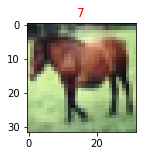

In [4]:
# 指定したラベルのインデックスを取得する
idx = np.where(y_train == 7)[0][0]
plt.figure(figsize = (2, 2))
plt.imshow(X_train[idx])
plt.title(idx, color = "red")

<font color = "Indigo"><b>5. 【課題】画像をまとめて表示</b></font>

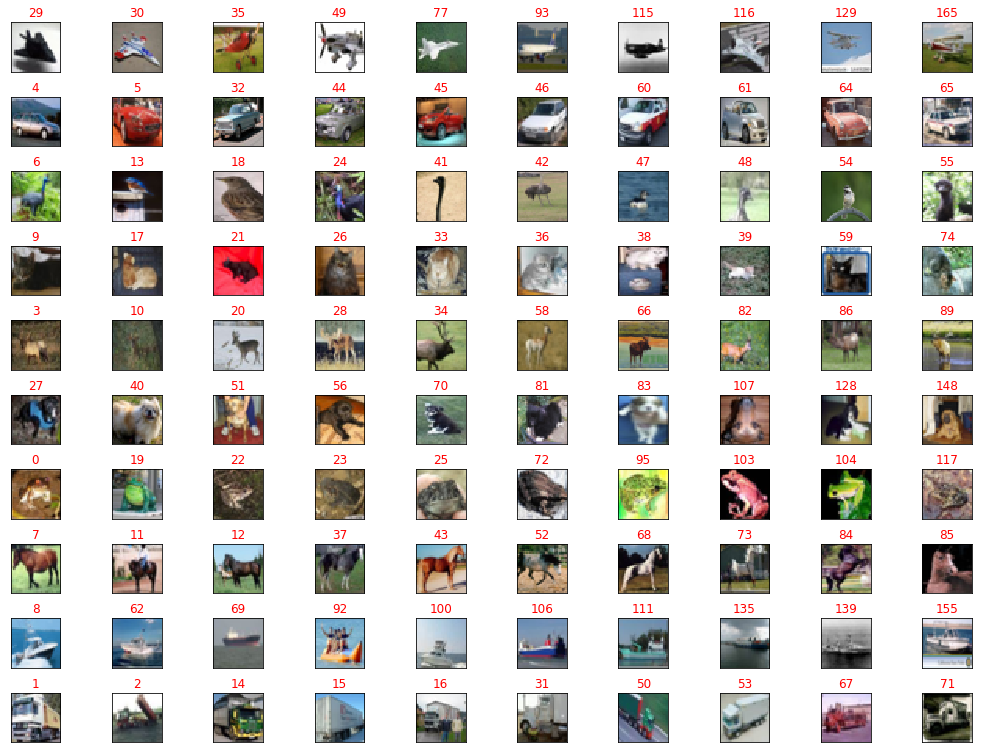

In [5]:
fig = plt.figure(figsize = (17, 10))
fig.subplots_adjust(left = 0, right = 0.8, bottom = 0, top = 1.0, hspace = 0.5, wspace = 0.5)
cnum = 10
for irow in range(cnum):
    for icol in range(cnum):
        iy = np.where(y_train == irow)[0][icol]
        ax = fig.add_subplot(cnum, cnum, irow * cnum + icol + 1, xticks = [], yticks = [])
        ax.imshow(X_train[iy].reshape((32, 32, 3)), cmap = "gray")
        plt.title(iy, color = "red")

<font color = "Indigo"><b>6. 【課題】大きさの取得</b></font>

In [6]:
img_rows = X_train[0].shape[1]
img_cols = X_train[0].shape[0]
num_classes = len(set(y_train[:, 0]))
input_shape = X_train.shape[1:4]
print("img_rows:   ", img_rows, "/ img_cols:   ", img_cols,
      "\nnum_classes:", num_classes, "/ input_shape:", input_shape)

img_rows:    32 / img_cols:    32 
num_classes: 10 / input_shape: (32, 32, 3)


<font color = "Indigo"><b>7. 【課題】正規化</b></font>

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

<font color = "Indigo"><b>8. 【課題】one-hot表現への変換</b></font>

In [8]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

<font color = "Indigo"><b>9. 【課題】モデルを作成</b></font>  
<br />
モデル: VGG / AlexNet / AlexNet2  
<br />
<font color = "Indigo"><b>(1) 構築</b></font>

In [9]:
def VGG():
    
    model = Sequential()
    

    model.add(Conv2D(64,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape))
    model.add(Conv2D(64,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2),
                           strides = (2, 2),
                           padding = "same"))
    
    model.add(Conv2D(128,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(128,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2),
                           strides = (2, 2),
                           padding = "same"))
    
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2),
                           strides = (2, 2),
                           padding = "same"))
    
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2),
                           strides = (2, 2),
                           padding = "same"))
    
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2, 2),
                           strides = (2, 2),
                           padding = "same"))
    
    # Converting output to one dimention for densely-connected NN layer
    model.add(Flatten())
    model.add(Dense(4096, activation = "relu"))
    model.add(Dense(4096, activation = "relu"))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adadelta(),
                  metrics = ["accuracy"])
    
    return model

In [10]:
def AlexNet():
    
    model = Sequential()
    weight_decay = 0.0005
    
    model.add(Conv2D(96,
                     kernel_size = (11, 11),
                     strides = (4, 4),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape,
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = "softmax"))
    
    # Tune6 - use sgd
    # learning_rate = 0.1
    # lr_decay = 1e-6
    # lrf = learning_rate
    # sgd = optimizers.SGD(lr = lrf, 
    #                      decay = lr_decay, 
    #                      momentum = 0.9, 
    #                      nesterov = True)
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])
    
    return model

In [11]:
# AlexNetに隠れ層を一つ追加
def AlexNet2():
    
    model = Sequential()
    weight_decay = 0.0005
    
    model.add(Conv2D(96,
                     kernel_size = (11, 11),
                     strides = (4, 4),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape,
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    
    # AlexNetに三つのConv2Dと一つのMaxPooling2Dを追加
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])
    
    return model

In [12]:
def AlexNet3():
    
    model = Sequential()
    weight_decay = 0.0005
    
    model.add(Conv2D(96,
                     kernel_size = (11, 11),
                     strides = (4, 4),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape,
                     kernel_regularizer = regularizers.l2(weight_decay)))
    # AlexNet3 - Added one conv2d
    model.add(Conv2D(96,
                     kernel_size = (11, 11),
                     strides = (4, 4),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape,
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    # AlexNet3 - Added one conv2d
    model.add(Conv2D(256,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(384,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(4096,  # AlexNet3 - Changed to 4096 from 2048
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(4096,  # AlexNet3 - Changed to 4096 from 2048
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])
    
    return model

In [13]:
def AlexNet4():
    
    model = Sequential()
    # weight_decay = 0.0005
    weight_decay = 0.0005  # updated on 2018/03/02
    
    model.add(Conv2D(64,
                     kernel_size = (11, 11),
                     strides = (4, 4),
                     padding = "same",
                     activation = "relu",
                     input_shape = input_shape,
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())

    model.add(Conv2D(128,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(256,
                     kernel_size = (5, 5),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    model.add(BatchNormalization())
    '''
    model.add(Conv2D(512,
                     kernel_size = (3, 3),
                     strides = 1,
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))    
    model.add(MaxPooling2D(pool_size = (3, 3),
                         strides = (2, 2),
                         padding = "same"))
    model.add(BatchNormalization())
    '''
    model.add(Flatten())
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.125))
    model.add(Dense(2048, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.125))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])
    
    return model

In [14]:
def AlexNet5():
    
    model = Sequential()
    weight_decay = 0.0005
    model.add(Conv2D(32, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     input_shape = input_shape,
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(32, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(64, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(128, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(128, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(256, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(256, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.25))
    model.add(Dense(512, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])

    return model

In [16]:
def AlexNet6():
    
    model = Sequential()
    weight_decay = 0.0005
    model.add(Conv2D(32, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     input_shape = input_shape,
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(32, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Conv2D(64, 
                     kernel_size = (3, 3),
                     strides = (1, 1),
                     padding = "same",
                     activation = "relu",
                     kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(MaxPooling2D(pool_size = (3, 3),
                           strides = (2, 2),
                           padding = "same"))
    # model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.25))
    model.add(Dense(512, 
                    activation = "relu",
                    kernel_regularizer = regularizers.l2(weight_decay)))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation = "softmax"))
    
    model.compile(loss = losses.categorical_crossentropy,
                  optimizer = optimizers.Adam(),
                  metrics = ["accuracy"])

    return model

<font color = "Indigo"><b>(2) 予測</b></font>

In [17]:
'''
# Data Augmentationなし
model = AlexNet2()
model.fit(X_train, y_train,
          batch_size = 128,
          epochs = 80, # tuning1 - 2 to 10
          verbose = 1,
          validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)
print("Total loss:", score[0])
print("Total accuracy:", score[1])
'''

'\n# Data Augmentationなし\nmodel = AlexNet2()\nmodel.fit(X_train, y_train,\n          batch_size = 128,\n          epochs = 80, # tuning1 - 2 to 10\n          verbose = 1,\n          validation_data = (X_test, y_test))\nscore = model.evaluate(X_test, y_test, verbose = 1)\nprint("Total loss:", score[0])\nprint("Total accuracy:", score[1])\n'

In [21]:
#　Data augumentation & annealer
# To user annealer
from keras.callbacks import ReduceLROnPlateau

model = AlexNet6()
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_acc",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

if not data_augumentation:
    model.fit(X_train, y_train,
              batch_size = 128,
              epochs = 50, # tuning1 - 2 to 50
              verbose = 1,
              validation_data = (X_test, y_test))
else:
    datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,
        samplewise_std_normalization = False,
        zca_whitening = False,
        rotation_range = 0,  #30 is bad
        width_shift_range = 0.1,  #0.2 is bad
        height_shift_range = 0.1,  #0.2 is bad
        # shear_range=0.2,  #Added is bad
        # zoom_range=0.2,  #Added is bad
        horizontal_flip = True,
        vertical_flip = False)
    datagen.fit(X_train)
    model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                        epochs = 50, # tuning1 - 2 to 50 
                        validation_data = (X_test, y_test),
                        workers = 4,
                        callbacks = [learning_rate_reduction])

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

score = model.evaluate(X_test, y_test, verbose = 1)
print("Total loss:", score[0])
print("Total accuracy:", score[1])

Epoch 1/50
391/391 [==============================] - 290s 742ms/step - loss: 1.8767 - acc: 0.3799 - val_loss: 1.3943 - val_acc: 0.5452

##### ・<u>AlexNet6 - チューニングと結果</u>
<b>Trial-1＿＿＿</b>  
チューニング: あり  
AlexNet5からの変更点  
Conv2D: 32x2, 64x2のみ  
epochs数を50に設定 -> epochs = 50  
Data augmentationあり  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
Annealing採用  
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6  
その他パラメータはAlexNet5のTrial-1と同じ  
結果:  
Epoch 50/50  
390/391 - ETA: 0s - loss: 0.7266 - acc: 0.8235  
Epoch 00050: reducing learning rate to 0.0002500000118743628.
391/391 - 309s 791ms/step - loss: 0.7266 - acc: 0.8235 - val_loss: 0.6645 - val_acc: 0.8408  
10000/10000 - 21s 2ms/step
Total loss: 0.664491413736  
Total accuracy: 0.8408  

#### ・<u>AlexNet5 - チューニングと結果</u>
<b>Trial-1＿＿＿</b>  
チューニング: あり  
AlexNet4からの変更点  
Conv2D: 32x2, 64x2, 128x2のみ  
epochs数を50に設定 -> epochs = 50  
Data augmentationあり  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
その他パラメータはAlexNet2のTrial-2と同じ  
結果:  
Epoch 50/50
391/391 - 398s 1s/step - loss: 0.8036 - acc: 0.7944 - val_loss: 0.7138 - val_acc: 0.8247
10000/10000 - 28s 3ms/step
Total loss: 0.713777020264
Total accuracy: 0.8247

#### ・<u>これより上は課題提出後のTrial</u>

#### ・<u>AlexNet4 - チューニングと結果</u>

#### <font color = "red">BEST!</font>
<b>Trial-2＿＿＿</b>  
チューニング: あり  
Conv2D: 64, 128, 256のみ  
epochs数を100に設定 -> epochs = 100  
dropoutを0.5から0.25に変更 -> model.add(Dropout(0.25)) *学習不足と考えられるため  
AlexNet2からのチューニングは、各モデル定義の「AlexNet3」のコメントの通り  
Data augmentationあり  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
その他パラメータはAlexNet2のTrial-2と同じ  
結果:  
Epoch 100/100
391/391 - 186s 476ms/step - loss: 0.9721 - acc: 0.7550 - val_loss: 1.1801 - val_acc: 0.6979  
10000/10000 - 10s 1ms/step  
Total loss: 1.18006224327  
Total accuracy: 0.6979  

<b>Trial-1＿＿＿</b>  
チューニング: あり  
Conv2D: 64, 128, 256のみ  
epochs数を150に設定 -> epochs = 150  
AlexNet2からのチューニングは、各モデル定義の「AlexNet3」のコメントの通り  
Data augmentationあり  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
その他パラメータはAlexNet2のTrial-2と同じ  
結果:  
Epoch 150/150
391/391 - 142s 364ms/step - loss: 1.0186 - acc: 0.7529 - val_loss: 1.2188 - val_acc: 0.6798  
10000/10000 - 7s 722us/step
Total loss: 1.21879373627  
Total accuracy: 0.6798  

#### ・<u>AlexNet3 - チューニングと結果</u>

<b>Trial-1＿＿＿</b>  
チューニング: あり  
epochs数を100に設定 -> epochs = 100  
AlexNet2からのチューニングは、各モデル定義の「AlexNet3」のコメントの通り  
Data augmentationあり  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
その他パラメータはAlexNet2のTrial-2と同じ  
結果:  
実行中に強制終了  

#### ・<u>AlexNet2 - チューニングと結果</u>

<b>Trial-2＿＿＿</b>  
チューニング: あり  
Data augmentation  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
パラメータはAlexNet2のTrial-1と同じ  
結果:  
Epoch 80/80: 391/391 - 588s 2s/step - loss: 1.0589 - acc: 0.7362 - val_loss: 1.2174 - val_acc: 0.6872  
10000/10000 - 22s 2ms/step  
Total loss: 1.21738366833  
Total accuracy: 0.6872


<b>Trial-1＿＿＿</b>  
チューニング: あり  
パラメータはAlexNetのTrial-10と同じ  
AlexNet2はAlexNetの最後のCNNレイヤを一つ追加  (384/384/256)  
結果:  
Epoch 80/80: 50000/50000 - 566s 11ms/step - loss: 0.7318 - acc: 0.9165 - val_loss: 1.9881 - val_acc: 0.6417  
10000/10000 - 23s 2ms/step  
Total loss: 1.98809660568  
Total accuracy: 0.6417  

#### ・<u>AlexNet - チューニングと結果</u>

#### <font color = "red">採用!</font>
<b>Trial-11＿＿＿</b>  
チューニング: あり  
Data augmentation  
https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py  
パラメータはAlexNetのTrial-10と同じ  
結果:  
Epoch 80/80: 391/391 - 456s 1s/step - loss: 1.0295 - acc: 0.7445 - val_loss: 1.1823 - val_acc: 0.693  
10000/10000 - 20s 2ms/step   
Total loss: 1.18227014523  
Total accuracy: 0.6938

<b>Trial-10＿＿＿</b>  
チューニング:あり  
optimizerをAdadeltaからAdamに変更 -> optimizer = optimizers.Adam()  
L2ノルム(Weight_decay)を0.0005  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を80に設定 -> epochs = 80  
Dropoutを0.50(25%) -> model.add(Dropout(0.5))  
結果:  
Epoch 80/80: 50000/50000 - 449s 9ms/step - loss: 0.7122 - acc: 0.9169 - val_loss: 1.9762 - val_acc: 0.6397  
10000/10000 - 20s 2ms/step  
Total loss: 1.97622363815  
Total accuracy: 0.6397  

<b>Trial-9＿＿＿</b>  
チューニング:あり  
optimizerをAdamからAdadeltaに変更 -> optimizer = optimizers.Adadelta()  
L2ノルム(Weight_decay)を0.0005として追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を80に設定 -> epochs = 80  
Dropoutを0.25(12.5%)から0.50(25%)に戻し -> model.add(Dropout(0.5))  
結果:  
Epoch 80/80: 50000/50000 - 448s 9ms/step - loss: 0.4380 - acc: 0.9658 - val_loss: 3.6419 - val_acc: 0.5290  
10000/10000 - 20s 2ms/step  
Total loss: 3.64190077248  
Total accuracy: 0.529

<b>Trial-8＿＿＿</b>  
チューニング:あり  
optimizerをAdamからAdadeltaに変更 -> optimizer = optimizers.Adadelta()  
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0001  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を80に設定 -> epochs = 80  
結果:  
Total loss: 2.56881402187  
Total accuracy: 0.63

<b>Trial-7＿＿＿</b>  
チューニング:あり  
optimizerをAdadeltaからAdamに変更 -> optimizer = optimizers.Adam()  
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を10に設定 -> epochs = 10  
結果:  
Total loss: 1.93751607704  
Total accuracy: 0.6327  

<b>Trial-6＿＿＿</b>  
チューニング:あり  
optimizerをAdadeltaからsgdに変更  
　-> learning_rate = 0.1  
　-> lr_decay = 1e-6  
　-> lrf = learning_rate  
　-> sgd = optimizers.SGD(lr = lrf, decay = lr_decay, momentum = 0.9, nesterov = True)  
　-> optimizers.sgd()   
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を10に設定 -> epochs = 10  
結果:  
Total loss: 1.81881199074  
Total accuracy: 0.5329  

<b>Trial-5＿＿＿</b>   
チューニング:あり  
optimizerはAdadeltaに戻した  
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を10に設定 -> epochs = 10   
結果:   
Epoch 1/10: 50000/50000 - 419s 8ms/step - loss: 3.2732 - acc: 0.3962 - val_loss: 3.8974 - val_acc: 0.2296  
Epoch 2/10: 50000/50000 - 423s 8ms/step - loss: 2.4557 - acc: 0.5260 - val_loss: 3.3176 - val_acc: 0.3542  
Epoch 3/10: 50000/50000 - 453s 9ms/step - loss: 1.9450 - acc: 0.5843 - val_loss: 1.9799 - val_acc: 0.5376  
Epoch 4/10: 50000/50000 - 438s 9ms/step - loss: 1.6137 - acc: 0.6257 - val_loss: 1.6840 - val_acc: 0.5747  
Epoch 5/10: 50000/50000 - 429s 9ms/step - loss: 1.3929 - acc: 0.6593 - val_loss: 1.4542 - val_acc: 0.6316  
Epoch 6/10: 50000/50000 - 434s 9ms/step - loss: 1.2348 - acc: 0.6885 - val_loss: 1.5863 - val_acc: 0.5661  
Epoch 7/10: 50000/50000 - 1675s 34ms/step - loss: 1.1181 - acc: 0.7159 - val_loss: 1.5236 - val_acc: 0.5925  
Epoch 8/10: 50000/50000 - 440s 9ms/step - loss: 1.0251 - acc: 0.7438 - val_loss: 1.4265 - val_acc: 0.6300  
Epoch 9/10: 50000/50000 - 438s 9ms/step - loss: 0.9570 - acc: 0.7612 - val_loss: 1.4285 - val_acc: 0.6307  
Epoch 10/10: 50000/50000 - 435s 9ms/step - loss: 0.9008 - acc: 0.7793 - val_loss: 1.5848 - val_acc: 0.6065  
10000/10000 - 21s 2ms/stepv  
Total loss: 1.58478315201  
Total accuracy: 0.6065

<b>Trial-4＿＿＿</b>  
チューニング:あり   
optimizerをAdadeltaからAdamに変更 -> optimizers.Adam()  
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を4に設定 -> epochs = 4      
結果:   
Epoch 1/4: 50000/50000 - 416s 8ms/step - loss: 2.8807 - acc: 0.3875 - val_loss: 2.3467 - val_acc: 0.4227  
Epoch 2/4: 50000/50000 - 419s 8ms/step - loss: 1.8738 - acc: 0.5097 - val_loss: 2.0380 - val_acc: 0.4142  
Epoch 3/4: 50000/50000 - 422s 8ms/step - loss: 1.5918 - acc: 0.5558 - val_loss: 1.5872 - val_acc: 0.5245  
Epoch 4/4: 50000/50000 - 422s 8ms/step - loss: 1.4519 - acc: 0.5962 - val_loss: 1.8096 - val_acc: 0.4846  
10000/10000 - 21s 2ms/step - ETA: 7s  
Total loss: 1.80957671719  
Total accuracy: 0.4846

<b>Trial-3＿＿＿</b>  
チューニング: あり   
L2ノルム(Weight_decay)の追加  
　-> weight_decay = 0.0005  
　-> kernel_regularizer = regularizers.l2(weight_decay)  
epochs数を4に設定 -> epochs = 4  
結果:   
Epoch 1/4: 50000/50000 - 420s 8ms/step - loss: 3.2613 - acc: 0.4022 - val_loss: 3.2437 - val_acc: 0.3573  
Epoch 2/4: 50000/50000 - 414s 8ms/step - loss: 2.4559 - acc: 0.5269 - val_loss: 2.7621 - val_acc: 0.4142  
Epoch 3/4: 50000/50000 - 415s 8ms/step - loss: 1.9386 - acc: 0.5902 - val_loss: 1.8942 - val_acc: 0.5643  
Epoch 4/4: 50000/50000 - 419s 8ms/step - loss: 1.6035 - acc: 0.6314 - val_loss: 1.6823 - val_acc: 0.58433  
10000/10000 - 20s 2ms/step  
Total loss: 1.68226953335  
Total accuracy: 0.5843

<b>Trial-2＿＿＿</b>  
チューニング: あり  
epochs数を4に設定 -> epochs = 4  
結果:   
Epoch 1/4: 50000/50000 - 416s 8ms/step - loss: 1.6283 - acc: 0.4065 - val_loss: 1.9519 - val_acc: 0.3407  
Epoch 2/4: 50000/50000 - 439s 9ms/step - loss: 1.2908 - acc: 0.5308 - val_loss: 1.9078 - val_acc: 0.4157  
Epoch 3/4: 50000/50000 - 426s 9ms/step - loss: 1.1352 - acc: 0.5930 - val_loss: 1.3279 - val_acc: 0.5342  
Epoch 4/4: 50000/50000 - 420s 8ms/step - loss: 1.0144 - acc: 0.6397 - val_loss: 1.4145 - al_acc: 0.4886  
10000/10000  - 19s 2ms/step  
Total loss: 1.4145330246  
Total accuracy: 0.4886  

<b>Trial-1＿＿＿</b>  
チューニング: なし  
結果:  
Epoch 1/2: 50000/50000 - 418s 8ms/step - loss: 1.6373 - acc: 0.4047 - val_loss: 1.8603 - val_acc: 0.3519  
Epoch 2/2: 50000/50000 - 502s 10ms/step - loss: 1.3015 - acc: 0.5289 - val_loss: 1.3274 - val_acc: 0.5132  
10000/10000 - 17s 2ms/step
Total loss: 1.32744003143  
Total accuracy: 0.5132

#### ・<u>VGG - チューニングと結果</u>

<b>Trial-2＿＿＿</b>    
チューニング: あり  
epochs数を10に設定 -> epochs = 10   
結果:  
epoch2回目から6回目まで訓練と検証のlossとaccuracyが変わらないため、6回目で終了    
Epoch 6/10: 50000/50000 - 3301s 66ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000   

<b>Trial-1＿＿＿</b>  
チューニング: なし  
結果:    
Epoch 1/2: 50000/50000 - 3194s 64ms/step - loss: 10.5895 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000  
Epoch 2/2: 50000/50000 - 3932s 79ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10000  
10000/10000 - 147s 15ms/step  
Total loss: 14.5062856903  
Total accuracy: 0.1  

<font color = "Indigo"><b>10. 課題】このようなモデルにした理由</b></font>  
<br />
<u><b>答え:</b></u>  
  
最終的に活用するモデルは、チューニングを施したAlexNetのTrial11  
  
チューニングポイント:  
・データ拡張  
・optimizerをAdadeltaからAdamに変更  
・L2ノルム(Weight_decay)を0.0005 に設定  
・epochs数を80に設定  
・Dropoutを0.50(25%)に設定  
  
理由:  
データ拡張することにより、認識精度が上がると考えられ、実際に向上した。  
(AlexNetのTrial10でのAccが63.97%だったが、AlexNetのTrial11でのAccが69.38%)  
その他のパラメータは実行しながら、最適なものを選んだ。  
なお、AlexNet4としたものがAccは69.79と最高だったが、epoch後半(50から100まで)でのAccの上下動が62%から72%と高かったため、あまり良いモデルではないと判断した。  